# Датасэт - квартиры

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = 'drive/MyDrive/DS/house/'

In [3]:
df = pd.read_csv(path+'real_estate_data.csv', sep = '\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
df.is_apartment.value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [6]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [7]:
df[(df['ceiling_height'] < 4) & (df['ceiling_height'] > 2.3)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.3,3,NaN,False,False,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
13,20,3550000.0,42.80,2017-07-01T00:00:00,2,2.56,5.0,27.0,5,NaN,False,False,5.20,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [8]:
df = df[(df['ceiling_height'] < 4) & (df['ceiling_height'] > 2.3)]

In [9]:
mean_ceil_h = df.groupby('locality_name').mean()['ceiling_height']

In [10]:
cities_list = df.groupby('locality_name').mean()['ceiling_height'].index

In [11]:
cities_list

Index(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Высоцк',
       'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       ...
       'посёлок городского типа имени Свердлова',
       'посёлок при железнодорожной станции Вещево',
       'посёлок при железнодорожной станции Приветнинское',
       'посёлок станции Громово', 'садовое товарищество Новая Ропша',
       'садовое товарищество Рахья', 'село Копорье', 'село Павлово',
       'село Путилово', 'село Русско-Высоцкое'],
      dtype='object', name='locality_name', length=281)

In [12]:
for i, city in enumerate(cities_list):
  df.loc[df['locality_name'] == city]['ceiling_height'].fillna(mean_ceil_h[i], inplace = True)

df  

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.3,3,NaN,False,False,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
13,20,3550000.0,42.80,2017-07-01T00:00:00,2,2.56,5.0,27.0,5,NaN,False,False,5.20,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [13]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                9
living_area               787
floor                       0
is_apartment            12540
studio                      0
open_plan                   0
kitchen_area              923
balcony                  7177
locality_name              13
airports_nearest         2929
cityCenters_nearest      2912
parks_around3000         2911
parks_nearest            9143
ponds_around3000         2911
ponds_nearest            8710
days_exposition          2423
dtype: int64

In [14]:
#for i, city in enumerate(cities_list):
list(enumerate(cities_list))

[(0, 'Бокситогорск'),
 (1, 'Волосово'),
 (2, 'Волхов'),
 (3, 'Всеволожск'),
 (4, 'Выборг'),
 (5, 'Высоцк'),
 (6, 'Гатчина'),
 (7, 'Зеленогорск'),
 (8, 'Ивангород'),
 (9, 'Каменногорск'),
 (10, 'Кингисепп'),
 (11, 'Кириши'),
 (12, 'Кировск'),
 (13, 'Колпино'),
 (14, 'Коммунар'),
 (15, 'Красное Село'),
 (16, 'Кронштадт'),
 (17, 'Кудрово'),
 (18, 'Лодейное Поле'),
 (19, 'Ломоносов'),
 (20, 'Луга'),
 (21, 'Любань'),
 (22, 'Мурино'),
 (23, 'Никольское'),
 (24, 'Новая Ладога'),
 (25, 'Отрадное'),
 (26, 'Павловск'),
 (27, 'Петергоф'),
 (28, 'Пикалёво'),
 (29, 'Подпорожье'),
 (30, 'Приморск'),
 (31, 'Приозерск'),
 (32, 'Пушкин'),
 (33, 'Санкт-Петербург'),
 (34, 'Светогорск'),
 (35, 'Сертолово'),
 (36, 'Сестрорецк'),
 (37, 'Сланцы'),
 (38, 'Сосновый Бор'),
 (39, 'Сясьстрой'),
 (40, 'Тихвин'),
 (41, 'Тосно'),
 (42, 'Шлиссельбург'),
 (43, 'городской поселок Большая Ижора'),
 (44, 'городской поселок Янино-1'),
 (45, 'городской посёлок Будогощь'),
 (46, 'городской посёлок Виллози'),
 (47, 'городско

In [15]:
cols = ['airports_nearest', 'cityCenters_nearest']
for col in cols:
  df[col].fillna(0, inplace = True)
#df[['airports_nearest', 'cityCenters_nearest']].fillna(0, inplace = True) # двойные скобки, т.к. без них это series. если бы была одна колонка, то хватило бы 1 скобок
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                9
living_area               787
floor                       0
is_apartment            12540
studio                      0
open_plan                   0
kitchen_area              923
balcony                  7177
locality_name              13
airports_nearest            0
cityCenters_nearest         0
parks_around3000         2911
parks_nearest            9143
ponds_around3000         2911
ponds_nearest            8710
days_exposition          2423
dtype: int64

## Какое распределение имеет Last_Price?

In [16]:
import matplotlib.pyplot as plt


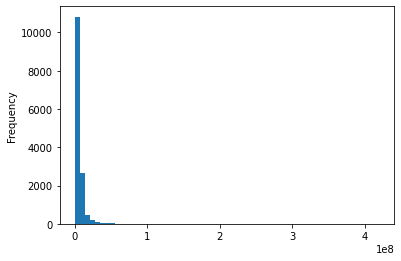

In [17]:
df['last_price'].plot.hist(bins=60)

# Список заданий

* Среднее время продажи
* Мода продажи
* Макс/Мин время продажи
* Графики зависимости цен от площади 
* График зав-ти цен от кол-ва комнат
* Зав-ть между удаленности от центра и ценой
* На каких этажах самые дорогие квартиры (Разделить квартиры на 1-ый этаж, послдений этаж (каким бы он ни был) и другие)
* Влияет ли день недели(Время, когда выложено объявление) на цену? (библиотека calendar)
* Влияет ли день недели на скорость продажи?
* В каком году продавались самые дорогие квартиры? (Вывести графики зав-ти года/месяца от цен)
* Вывести топ10 городов по кол-ву объявлений.
* Вывести среднюю цену по топ10 городам (ср. цена для каждого города) Самый дорогой город - там, где средний прайс в топ10. В порядке убывания
* Ср. цена за километр от центра
* Сравнить цены в центре города (2км от центра) с ценами в общем по городу (включая все цены)

# Подготовка данных

In [18]:
# делаем предположение, что если не указано, значит нет
df.is_apartment.fillna(0, inplace = True)
df.balcony.fillna(0, inplace = True)
df.parks_around3000.fillna(0, inplace = True)
df.parks_nearest.fillna(0, inplace = True)
df.ponds_around3000.fillna(0, inplace = True)
df.ponds_nearest.fillna(0, inplace = True)

# удаляем записи, в которых нет информации о городе (таких всего 13 из всего датасэта)
df.dropna(subset = ['locality_name'], inplace = True) 

In [19]:
# рассчитываем долю от общей площади, которую занимает жилая площадь / кухня
df['liv/total'] = df['living_area'] / df['total_area']
df['kitch/total'] = df['kitchen_area'] / df['total_area']
# заполняем нулями в тех местах, где нет информации о living/kitchen area
df['liv/total'].fillna(0, inplace = True)
df['kitch/total'].fillna(0, inplace = True) 

In [20]:
# подсчитываем среднюю долю кухни/жилой площади в зависимости от города
liv_proportion = df.groupby('locality_name').mean()['liv/total']
kitch_proportion = df.groupby('locality_name').mean()['kitch/total']

In [21]:
# подсчитываем среднее кол-во дней продажи в зав-ти от города
mean_days_exposition = df.groupby('locality_name').mean()['days_exposition']

In [22]:
mean_days_exposition[mean_days_exposition.isnull()]

locality_name
Мурино                                              NaN
городской посёлок Лесогорский                       NaN
городской посёлок Рощино                            NaN
городской посёлок Советский                         NaN
деревня Извара                                      NaN
деревня Коркино                                     NaN
деревня Котлы                                       NaN
деревня Кривко                                      NaN
деревня Меньково                                    NaN
деревня Новолисино                                  NaN
деревня Тойворово                                   NaN
поселок Заводской                                   NaN
поселок Кингисеппский                               NaN
поселок Котельский                                  NaN
поселок Лесное                                      NaN
поселок Лукаши                                      NaN
поселок Почап                                       NaN
поселок Рабитицы                  

In [23]:
null_days_exp =  mean_days_exposition.isnull().sum()
null_days_exp
#null_days_exp[null_days_exp > 0]

31

In [24]:
cities_list

Index(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Высоцк',
       'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       ...
       'посёлок городского типа имени Свердлова',
       'посёлок при железнодорожной станции Вещево',
       'посёлок при железнодорожной станции Приветнинское',
       'посёлок станции Громово', 'садовое товарищество Новая Ропша',
       'садовое товарищество Рахья', 'село Копорье', 'село Павлово',
       'село Путилово', 'село Русско-Высоцкое'],
      dtype='object', name='locality_name', length=281)

In [25]:
# заменяем nan значения на 0, т.к. нет информации в целом по городам
df['days_exposition'].fillna(0, inplace = True) 


df.isna().sum() 

total_images              0
last_price                0
total_area                0
first_day_exposition      0
rooms                     0
ceiling_height            0
floors_total              9
living_area             787
floor                     0
is_apartment              0
studio                    0
open_plan                 0
kitchen_area            922
balcony                   0
locality_name             0
airports_nearest          0
cityCenters_nearest       0
parks_around3000          0
parks_nearest             0
ponds_around3000          0
ponds_nearest             0
days_exposition           0
liv/total                 0
kitch/total               0
dtype: int64

In [26]:
# добавляем столбец с средней площадью living по городу
for i, city in enumerate(cities_list):
  df.loc[df['locality_name'] == city, 'new_liv_area_prop'] = liv_proportion[city]

In [27]:
# считаем площадь по формуле для заполнения nan значений 
df['new_liv_area'] = df['total_area'] * df['new_liv_area_prop']

In [28]:
# заполняем nan значения новыми подсчитанными значениями
df['living_area'].fillna(df['new_liv_area'], inplace = True)

In [29]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv/total,kitch/total,new_liv_area_prop,new_liv_area
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,0,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,0.472222,0.231481,0.540896,58.416749
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,0,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000,0.540896,54.089582
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.600000,7,0,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,0.0,289.0,0.714754,0.106557,0.540896,32.994645
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.300000,3,0,False,False,8.50,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,0.512626,0.214646,0.540896,21.419475
13,20,3550000.0,42.80,2017-07-01T00:00:00,2,2.56,5.0,27.000000,5,0,False,False,5.20,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,0.630841,0.121495,0.571968,24.480239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.300000,7,0,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,0.0,1.0,806.0,519.0,0.552812,0.145405,0.540896,39.431305
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.000000,8,0,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,0.641026,0.128205,0.571968,35.690816
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.300000,3,0,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,0.0,0.547792,0.103356,0.540896,72.377270
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,41.513754,12,0,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,0.000000,0.303583,0.540896,41.513754


In [30]:
df.isna().sum() 

total_images              0
last_price                0
total_area                0
first_day_exposition      0
rooms                     0
ceiling_height            0
floors_total              9
living_area               0
floor                     0
is_apartment              0
studio                    0
open_plan                 0
kitchen_area            922
balcony                   0
locality_name             0
airports_nearest          0
cityCenters_nearest       0
parks_around3000          0
parks_nearest             0
ponds_around3000          0
ponds_nearest             0
days_exposition           0
liv/total                 0
kitch/total               0
new_liv_area_prop         0
new_liv_area              0
dtype: int64

In [31]:
# выполняем аналогичные действия для kitchen_area
for i, city in enumerate(cities_list):
  df.loc[df['locality_name'] == city, 'new_kitch_area_prop'] = kitch_proportion[city]

df['new_kitch_area'] = df['total_area'] * df['new_kitch_area_prop']
df['kitchen_area'].fillna(df['new_kitch_area'], inplace = True)

In [32]:
df[df['floors_total'].isnull()]
# тут можно увидеть, что неизвестно кол-во этажей в домах, где продается квартира. Сами квартиры находятся на самых разных этажах, от 2 до 23. Поэтому заполними floors_total для nan значений как floor + 1
df['new_floors_total'] = df['floor'] + 1
df['floors_total'].fillna(df['new_floors_total'], inplace = True)
df.drop(columns = 'new_floors_total', inplace = True)
df.isna().sum() 

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
liv/total               0
kitch/total             0
new_liv_area_prop       0
new_liv_area            0
new_kitch_area_prop     0
new_kitch_area          0
dtype: int64

# Задания

## Среднее время продажи

In [33]:
df.groupby('locality_name')['days_exposition'].mean()

locality_name
Бокситогорск                   45.000000
Волосово                      224.578947
Волхов                        108.964912
Всеволожск                    168.330855
Выборг                        191.914894
                                 ...    
садовое товарищество Рахья    307.000000
село Копорье                   61.333333
село Павлово                  169.400000
село Путилово                 261.500000
село Русско-Высоцкое          340.400000
Name: days_exposition, Length: 281, dtype: float64

## Мода продажи

In [34]:
df.groupby('locality_name')['days_exposition'].agg(pd.Series.mode)

locality_name
Бокситогорск                                                             45
Волосово                                                                  0
Волхов                                                                    0
Всеволожск                                                                0
Выборг                                                                    0
                                                  ...                      
садовое товарищество Рахья                                              307
село Копорье                                [0.0, 45.00000000000001, 139.0]
село Павлово                                                              0
село Путилово                                                 [75.0, 448.0]
село Русско-Высоцкое          [0.0, 6.000000000000001, 414.0, 504.0, 778.0]
Name: days_exposition, Length: 281, dtype: object

In [77]:
# Мода - значение 0. Если учесть, что были замены значения на 0, то имеет смысл рассмотреть "вторую" моду. Это значение 392
df['days_exposition'].value_counts()


0.0       2423
45.0       392
60.0       272
7.0        153
30.0       149
          ... 
755.0        1
1100.0       1
1076.0       1
748.0        1
709.0        1
Name: days_exposition, Length: 1034, dtype: int64

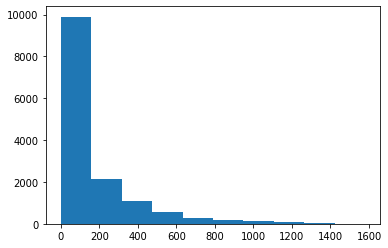

In [78]:
# диаграмма по кол-ву дней продажи квартиры
plt.hist(df['days_exposition']);

## Макс/Мин время продажи

In [36]:
df.groupby('locality_name')['days_exposition'].max()

locality_name
Бокситогорск                    45.0
Волосово                       903.0
Волхов                         503.0
Всеволожск                    1413.0
Выборг                        1005.0
                               ...  
садовое товарищество Рахья     307.0
село Копорье                   139.0
село Павлово                   518.0
село Путилово                  448.0
село Русско-Высоцкое           778.0
Name: days_exposition, Length: 281, dtype: float64

In [37]:
df.groupby('locality_name')['days_exposition'].min()

locality_name
Бокситогорск                   45.0
Волосово                        0.0
Волхов                          0.0
Всеволожск                      0.0
Выборг                          0.0
                              ...  
садовое товарищество Рахья    307.0
село Копорье                    0.0
село Павлово                    0.0
село Путилово                  75.0
село Русско-Высоцкое            0.0
Name: days_exposition, Length: 281, dtype: float64

## Графики зависимости цен от площади

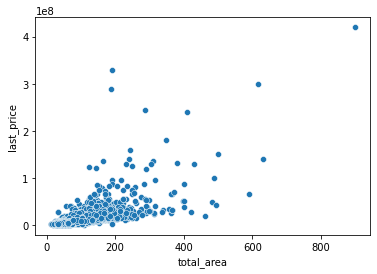

In [38]:
import seaborn as sns
g = sns.scatterplot(x=df['total_area'], y=df['last_price'])

## График зав-ти цен от кол-ва комнат

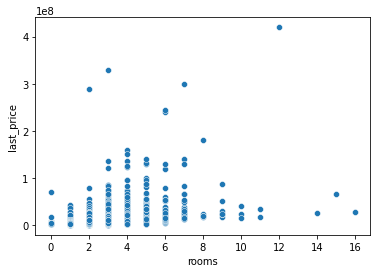

In [39]:
g = sns.scatterplot(x=df['rooms'], y=df['last_price'])

## График зав-ти удаленности от центра и цены

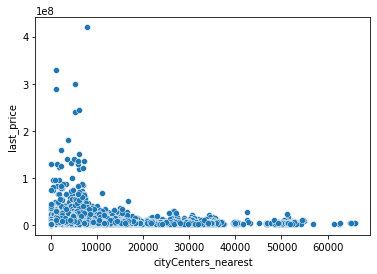

In [40]:
g = sns.scatterplot(x=df['cityCenters_nearest'], y=df['last_price'])

## На каких этажах самые дорогие квартиры? 


In [41]:
# Подсказка: (Разделить квартиры на 1-ый этаж, послдений этаж (каким бы он ни был) и другие)

In [42]:
df['floor_cat'] = 3
df.loc[df['floor'] == 1, 'floor_cat'] = 0 # 0 - первый этаж
df.loc[df['floor'] == df['floors_total'], 'floor_cat'] =  1 # 1 - последний этаж
df.loc[df['floor_cat'] == 3, 'floor_cat'] = 2 # 2 - не первый и не последний этаж

In [43]:
df.floor_cat.unique()

array([2, 1, 0])

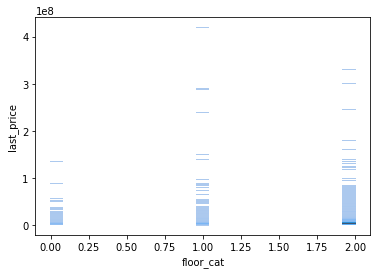

In [44]:
g = sns.histplot(x=df['floor_cat'], y=df['last_price'])
# на первом этаже квартиры дешевле всех, на последнем этаже квартиры в редких случаях могут быть дороже (цена может быть выше и из-за других причин). 

In [45]:
df.groupby('floor_cat')['last_price'].max() # самая дорогая квартира была на последнем этаже

floor_cat
0    135000000.0
1    420000000.0
2    330000000.0
Name: last_price, dtype: float64

In [46]:
df.loc[(df['last_price'] == 420000000.0) | (df['last_price'] == 135000000.0) | (df['last_price'] == 330000000.0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv/total,kitch/total,new_liv_area_prop,new_liv_area,new_kitch_area_prop,new_kitch_area,floor_cat
793,20,135000000.0,310.0,2018-05-22T00:00:00,4,3.3,5.0,250.0,2,0,False,False,50.0,0.0,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0,0.806452,0.161290,0.540896,167.677705,0.171715,53.231803,2
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.5,7.0,95.0,5,0,False,False,40.0,0.0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0,0.500000,0.210526,0.540896,102.770206,0.171715,32.625944,2
17912,17,135000000.0,166.0,2019-02-07T00:00:00,3,3.3,7.0,52.0,1,0,False,False,64.0,0.0,Санкт-Петербург,32863.0,5955.0,2.0,230.0,3.0,215.0,0.0,0.313253,0.385542,0.540896,89.788707,0.171715,28.504772,0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,0,False,False,112.0,0.0,Санкт-Петербург,30706.0,7877.0,0.0,0.0,2.0,318.0,106.0,0.455222,0.124444,0.540896,486.806240,0.171715,154.543944,1


##  Влияет ли день недели (время, когда выложено объявление) на цену?

In [47]:
# Подсказка: (библиотека calendar)
import calendar

In [48]:
for i in range(len((df.first_day_exposition.unique()))):
  print(df.first_day_exposition.unique()[i])

2019-03-07T00:00:00
2018-06-19T00:00:00
2017-02-26T00:00:00
2017-11-16T00:00:00
2017-07-01T00:00:00
2017-11-23T00:00:00
2017-01-27T00:00:00
2019-01-09T00:00:00
2017-09-28T00:00:00
2017-04-24T00:00:00
2016-10-29T00:00:00
2015-10-01T00:00:00
2017-05-12T00:00:00
2017-12-13T00:00:00
2017-10-26T00:00:00
2018-02-04T00:00:00
2017-10-28T00:00:00
2018-03-29T00:00:00
2018-11-29T00:00:00
2017-03-15T00:00:00
2015-07-08T00:00:00
2017-01-10T00:00:00
2018-12-02T00:00:00
2019-01-31T00:00:00
2018-11-22T00:00:00
2017-11-13T00:00:00
2017-10-17T00:00:00
2017-09-22T00:00:00
2018-03-24T00:00:00
2016-03-28T00:00:00
2017-07-05T00:00:00
2017-09-17T00:00:00
2018-09-11T00:00:00
2017-11-07T00:00:00
2018-03-03T00:00:00
2015-12-16T00:00:00
2018-08-28T00:00:00
2017-08-04T00:00:00
2018-09-16T00:00:00
2019-03-27T00:00:00
2018-12-09T00:00:00
2018-06-14T00:00:00
2018-02-27T00:00:00
2016-05-14T00:00:00
2016-03-13T00:00:00
2017-12-18T00:00:00
2018-02-23T00:00:00
2018-09-24T00:00:00
2018-11-26T00:00:00
2019-04-23T00:00:00


In [49]:
# Все данные в столбце содержат информацию только о дате, без времени.

In [50]:
df['first_day_exposition'] = df['first_day_exposition'].str.strip().str[:10]

In [51]:
import calendar
cssclasses = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]
print(cssclasses[calendar.weekday(int(df['first_day_exposition'][0][:4]), int(df['first_day_exposition'][0][5:7]), int(df['first_day_exposition'][0][-2:]))])

thu


In [52]:
df.reset_index(inplace= True)
df.drop(columns= 'index', inplace = True)
df['first_dayname_exposition'] = 'a'
for i in range(len(df['first_dayname_exposition'])):
  df.loc[:, 'first_dayname_exposition'][i] = cssclasses[calendar.weekday(int(df['first_day_exposition'][i][:4]), int(df['first_day_exposition'][i][5:7]), int(df['first_day_exposition'][i][-2:]))]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [53]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv/total,kitch/total,new_liv_area_prop,new_liv_area,new_kitch_area_prop,new_kitch_area,floor_cat,first_dayname_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,0,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,0.472222,0.231481,0.540896,58.416749,0.171715,18.545273,2,thu
1,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,0,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000,0.540896,54.089582,0.171715,17.171549,2,tue
2,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,0,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,0.0,289.0,0.714754,0.106557,0.540896,32.994645,0.171715,10.474645,2,sun
3,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.300000,3,0,False,False,8.50,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,0.512626,0.214646,0.540896,21.419475,0.171715,6.799934,2,thu
4,20,3550000.0,42.80,2017-07-01,2,2.56,5.0,27.000000,5,0,False,False,5.20,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,0.630841,0.121495,0.571968,24.480239,0.154533,6.613993,1,sat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14352,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.300000,7,0,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,0.0,1.0,806.0,519.0,0.552812,0.145405,0.540896,39.431305,0.171715,12.518059,2,thu
14353,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.000000,8,0,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,0.641026,0.128205,0.571968,35.690816,0.154533,9.642831,2,fri
14354,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,0,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,0.0,0.547792,0.103356,0.540896,72.377270,0.171715,22.977250,2,tue
14355,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,41.513754,12,0,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,0.000000,0.303583,0.540896,41.513754,0.171715,13.179164,2,tue


### График

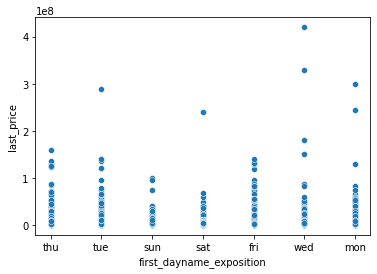

In [54]:
g = sns.scatterplot(x=df['first_dayname_exposition'], y=df['last_price'])
# по данному графику видно, что те квартиры, объявления для которых появились в выходные, стоили ниже. Самые пиковые цены были для квартир, выложенных в пнд, вт, ср. Можно наблюдать некоторую тенденцию, что чем дальше к концу недели была выложена квартира, тем ниже её last_price 

## Влияет ли день недели на скорость продажи?

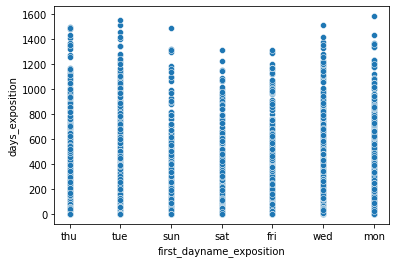

In [55]:
g = sns.scatterplot(x=df['first_dayname_exposition'], y=df['days_exposition'])
# По графику делаю вывод, что не влияет

## В каком году продавались самые дорогие квартиры? (Вывести графики зав-ти года/месяца от цен)

In [56]:
df['first_year_exposition'] = 'a'
df['first_month_exposition'] = 'a'
for i in range(len(df)):
  df.loc[:, 'first_year_exposition'][i] = int(df['first_day_exposition'][i][:4])
  df.loc[:, 'first_month_exposition'][i] = calendar.month_name[int(df['first_day_exposition'][i][5:7])]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [57]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv/total,kitch/total,new_liv_area_prop,new_liv_area,new_kitch_area_prop,new_kitch_area,floor_cat,first_dayname_exposition,first_year_exposition,first_month_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,0,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,0.472222,0.231481,0.540896,58.416749,0.171715,18.545273,2,thu,2019,March
1,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,0,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000,0.540896,54.089582,0.171715,17.171549,2,tue,2018,June
2,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,0,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,0.0,289.0,0.714754,0.106557,0.540896,32.994645,0.171715,10.474645,2,sun,2017,February
3,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.300000,3,0,False,False,8.50,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,0.512626,0.214646,0.540896,21.419475,0.171715,6.799934,2,thu,2017,November
4,20,3550000.0,42.80,2017-07-01,2,2.56,5.0,27.000000,5,0,False,False,5.20,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,0.630841,0.121495,0.571968,24.480239,0.154533,6.613993,1,sat,2017,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14352,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.300000,7,0,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,0.0,1.0,806.0,519.0,0.552812,0.145405,0.540896,39.431305,0.171715,12.518059,2,thu,2016,October
14353,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.000000,8,0,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,0.641026,0.128205,0.571968,35.690816,0.154533,9.642831,2,fri,2016,August
14354,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,0,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,0.0,0.547792,0.103356,0.540896,72.377270,0.171715,22.977250,2,tue,2017,March
14355,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,41.513754,12,0,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,0.000000,0.303583,0.540896,41.513754,0.171715,13.179164,2,tue,2017,March


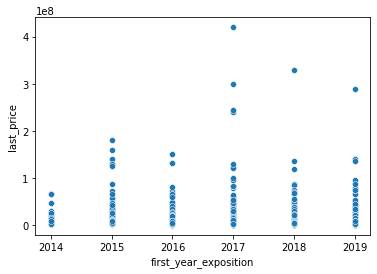

In [58]:
sns.scatterplot(x = df['first_year_exposition'], y = df['last_price']) # Самая дорогая квартира была продана в 2017 году

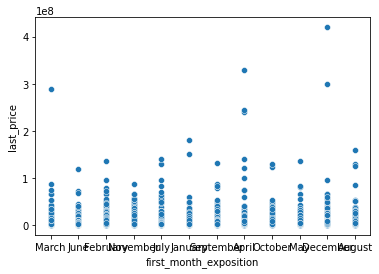

In [59]:
sns.scatterplot(x = df['first_month_exposition'], y = df['last_price']) # Самая дорогая квартира была продана в декабре (2017 года, исходя из графика выше)

## Вывести топ10 городов по кол-ву объявлений.

In [60]:
df.groupby('locality_name')['total_images'].count()

locality_name
Бокситогорск                    1
Волосово                       19
Волхов                         57
Всеволожск                    269
Выборг                         94
                             ... 
садовое товарищество Рахья      1
село Копорье                    3
село Павлово                    5
село Путилово                   2
село Русско-Высоцкое            5
Name: total_images, Length: 281, dtype: int64

In [61]:
grouped = df.groupby('locality_name').count().reset_index()
top10_cities_by_amount = grouped.sort_values('total_images', ascending=False).head(10).iloc[:,:2]
top10_cities_by_amount.rename(columns={'total_images':'offers_amount'}, inplace = True)
top10_cities_by_amount

,locality_name,offers_amount
33,Санкт-Петербург,10010
3,Всеволожск,269
32,Пушкин,232
253,посёлок Шушары,217
13,Колпино,203
227,посёлок Мурино,198
6,Гатчина,147
27,Петергоф,145
230,посёлок Парголово,137
36,Сестрорецк,128


## Взять среднюю цену по всем городам и вывести топ10 городов с самой высокой средней ценой в порядке убывания.

In [62]:
grouped_price = df.groupby('locality_name').mean()['last_price'].reset_index()

In [63]:
top10_cities_by_price = grouped_price.sort_values('last_price', ascending=False).head(10)
top10_cities_by_price.set_index('locality_name', inplace = True)

In [64]:
top10_cities_by_price['last_price'] = top10_cities_by_price['last_price'].astype(int)
top10_cities_by_price

,last_price
locality_name,
деревня Бор,20295200
посёлок Александровская,13700000
посёлок Репино,12166854
деревня Хязельки,11000000
Санкт-Петербург,8073685
Сестрорецк,6465263
Пушкин,6276218
Зеленогорск,6030526
деревня Мистолово,5348333


In [65]:
df.loc[df['locality_name'] == 'деревня Бор'] # отсюда и высокая средняя цена, т.к. объявление всего одно

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv/total,kitch/total,new_liv_area_prop,new_liv_area,new_kitch_area_prop,new_kitch_area,floor_cat,first_dayname_exposition,first_year_exposition,first_month_exposition
7132,1,20295200.0,192.3,2018-02-13,6,2.95,2.0,147.2,1,False,False,False,17.8,0.0,деревня Бор,0.0,0.0,0.0,0.0,0.0,0.0,162.0,0.765471,0.092564,0.765471,147.2,0.092564,17.8,0,tue,2018,February


## Ср. цена за километр от центра

In [66]:
df.loc[df['cityCenters_nearest'] == 0]['locality_name'].unique() # во всех случаях, когда расстояние от центра равно нулю, речь идет о малонаселенным пунктах. Примем за данность, что в таком случае на цену не влияет удаленность от центра

array(['деревня Кудрово', 'поселок городского типа Красный Бор',
       'посёлок Мурино', 'Сертолово', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'посёлок городского типа Сиверский',
       'садовое товарищество Новая Ропша', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'поселок городского типа Кузьмоловский',
       'деревня Куттузи', 'поселок Торковичи', 'поселок Первомайское',
       'деревня Старая', 'деревня Лесколово', 'посёлок Новый Свет',
       'село Путилово', 'Ивангород', 'Сланцы', 'Шлиссельбург',
       'Никольское', 'Сосновый Бор', 'деревня Оржицы', 'деревня Кальтино',
       'Кудрово', 'поселок городского типа Рощино', 'Сясьстрой', 'Кириши',
       'Луга', 'Волосово', 'поселок Оредеж',
       'посёлок городского типа Красный Бор', 'поселок Бугры', 'Тихвин',
       'Санкт-Петербург', 'посёлок Победа', 'деревня Нурма',
       'поселок городского типа Синявино', 'Тосно',
       'посёлок городс

In [67]:
df['price_for_centredistance'] = 0

In [68]:
df.loc[df['cityCenters_nearest'] == 0, 'price_for_centredistance'] = 1 
df.loc[df['cityCenters_nearest'] != 0, 'price_for_centredistance'] = df['last_price'] / df['cityCenters_nearest']

In [69]:
df['price_for_centredistance'].mean() 

1039.2788912447463

## Сравнить цены в центре города (2км от центра) с ценами в общем по городу (включая все цены)

In [70]:
df.loc[df['cityCenters_nearest'] < 2, 'last_price'].mean() / df['last_price'].mean()

0.47849749330365027